In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file(r"C:\Users\Valeria\Documents\QMUL\hep\HERE data\csv weekdays 06 to 23\MER_streets_1180m_radius.geojson")
df = pd.read_csv(r"C:\Users\Valeria\Documents\QMUL\hep\HERE data\csv weekdays 06 to 23\MER_weekday_0600_2259.csv")

In [6]:
df.head()

,link_dir,date,time,epoch_5min,length,freeflow,spdlimit,count,mean,harmonic_mean,...,stddev,min,max,confidence,link_id,time_dt,hour,func_class_x,link_dir_time,func_class_y
0,1021599287T,2023-09-25,06:00:00,72,149,40.0,40.0,1,58.0,58.0,...,0.0,58,58,10,1021599287,2023-09-25 06:00:00,06:00:00,2,1021599287T06:00:00,2
1,1021599287T,2023-09-25,06:05:00,73,149,40.0,40.0,2,51.5,51.5,...,0.7,51,52,30,1021599287,2023-09-25 06:00:00,06:00:00,2,1021599287T06:00:00,2
2,1021599287T,2023-09-25,06:15:00,75,149,40.0,40.0,1,70.0,70.0,...,0.0,70,70,10,1021599287,2023-09-25 06:00:00,06:00:00,2,1021599287T06:00:00,2
3,1021599287T,2023-09-25,06:20:00,76,149,40.0,40.0,2,53.5,53.1,...,6.4,49,58,30,1021599287,2023-09-25 06:00:00,06:00:00,2,1021599287T06:00:00,2
4,1021599287T,2023-09-25,06:25:00,77,149,40.0,40.0,4,47.5,47.4,...,2.5,44,50,30,1021599287,2023-09-25 06:00:00,06:00:00,2,1021599287T06:00:00,2


In [7]:
df = df.merge(gdf[['link_id', 'func_class']],  on='link_id', how='left')
df["link_dir_time"] = df["link_dir"] + df['hour'].astype(str)
hour_rows = df.groupby('link_dir_time').agg({'link_dir':'first','hour':'first','harmonic_mean': 'mean','mean': 'mean',
                                              'func_class':'first', 'freeflow': 'first', 'spdlimit':'first'}).reset_index()

df_pol = pd.read_csv(r"C:\Users\Valeria\Documents\CIC\air_pollution_data\datos_por_estacion_2005_dic2024\MER.csv")
df_pol["date_"] = df_pol["date"].str[0:10] 
df_pol_ = df_pol[df_pol.date_ >= '2023-09-25'] 
df_pol_ = df_pol_[df_pol_.date_ <= '2024-09-25']
df_pol_["time"] =pd.to_datetime(df_pol_["date"]).dt.time
df_pol_hour_rows = df_pol_.groupby('time').agg({'CO':'mean','NO':'mean','NOX': 'mean','NO2': 'mean',
                                              'O3':'mean', 'PM10': 'mean', 'PM25':'mean',
                                              'SO2':'mean', }).reset_index()
df_pol_hour_rows = df_pol_hour_rows[df_pol_hour_rows['time'] >= pd.to_datetime('06:00:00').time()]
df_pol_hour_rows = df_pol_hour_rows[df_pol_hour_rows['time'] <= pd.to_datetime('22:00:00').time()]


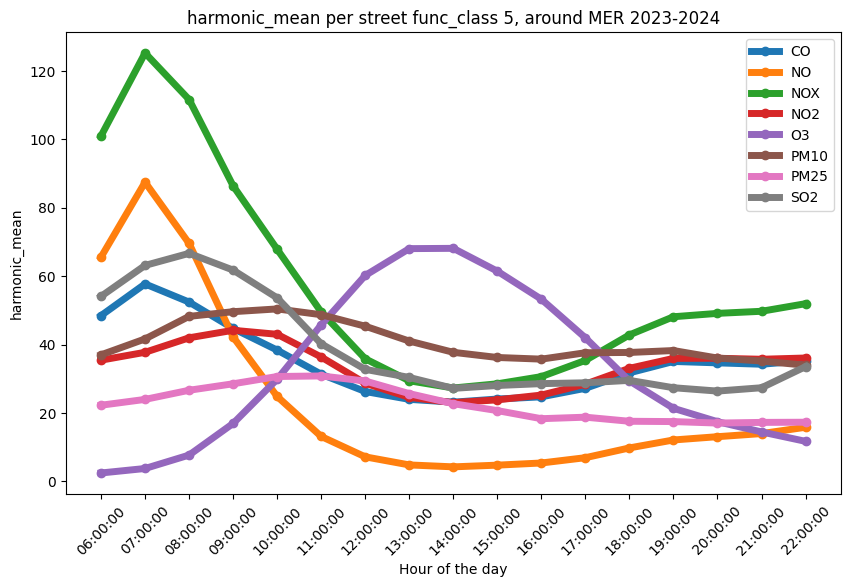

In [8]:
parameter = "harmonic_mean"
pollutants = ['CO', 'NO', 'NOX', 'NO2', 'O3', 'PM10', 'PM25', 'SO2']
plt.figure(figsize=(10, 6))
hour_rows_ = hour_rows[hour_rows['func_class'].isin(["2"])]
for pollutant in pollutants:
	if pollutant == "SO2":
		plt.plot(df_pol_hour_rows['time'].astype(str), df_pol_hour_rows[pollutant]*10, marker='o', label=pollutant, linewidth=5)
	elif pollutant == "CO":
		plt.plot(df_pol_hour_rows['time'].astype(str), df_pol_hour_rows[pollutant]*40, marker='o', label=pollutant, linewidth=5)
	else:
		plt.plot(df_pol_hour_rows['time'].astype(str), df_pol_hour_rows[pollutant], marker='o', label=pollutant, linewidth=5)
plt.ylabel(parameter)
plt.xlabel("Hour of the day")
plt.title((parameter +" per street func_class 5, around MER 2023-2024"))
plt.xticks(rotation=45)
plt.legend()
plt.show()    

df_norm = df_pol_hour_rows.copy()
df_norm[pollutants] = df_norm[pollutants].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

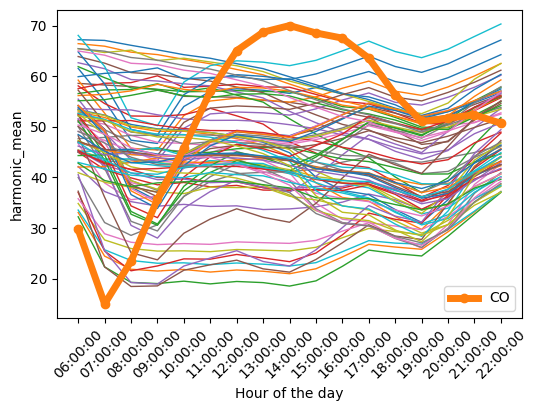

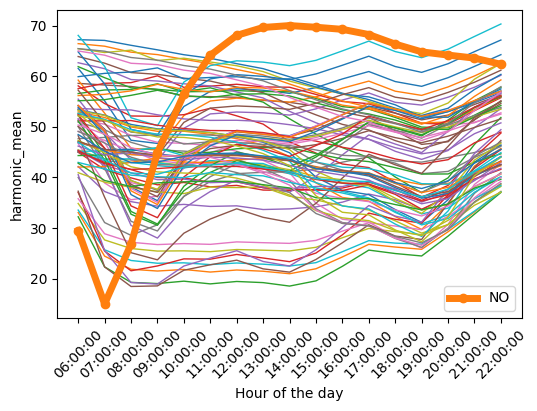

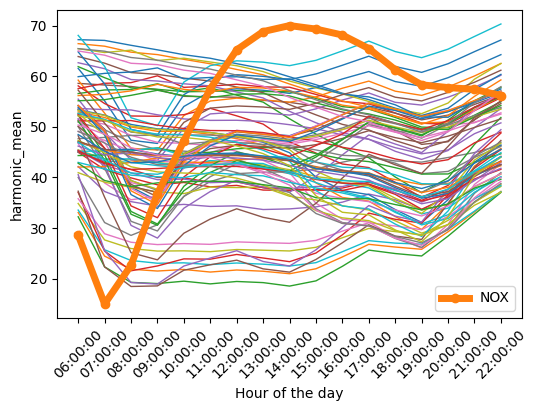

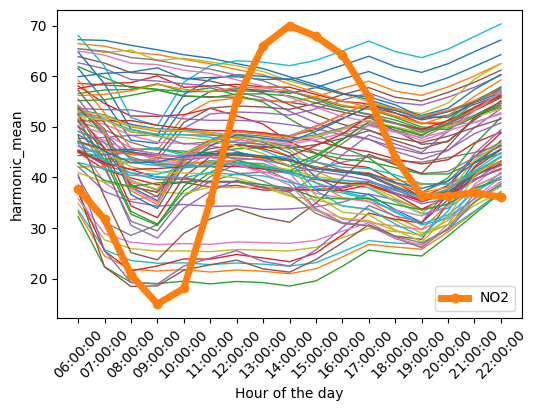

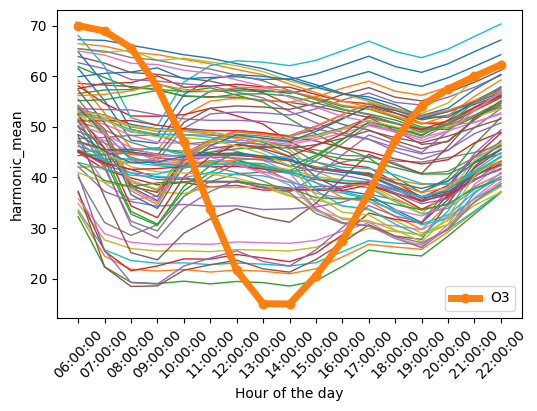

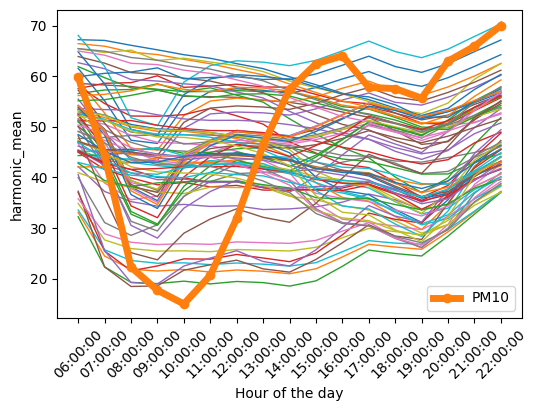

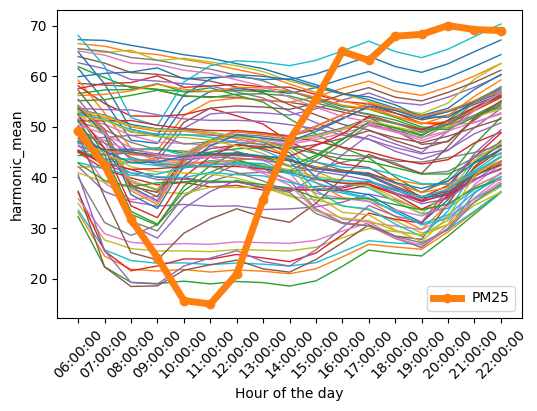

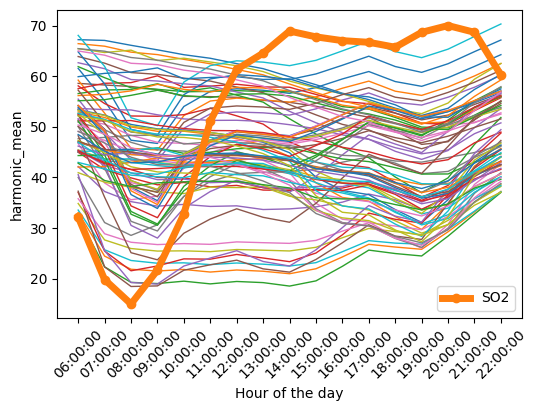

In [ ]:
col_min = 15
col_max = 70
for col in pollutants:
    df_norm[col] = df_norm[col] * (col_min - col_max) + col_max
    
parameter = "harmonic_mean"
for pollutant in pollutants:
	plt.figure(figsize=(6, 4))
	hour_rows_ = hour_rows[hour_rows['func_class'].isin(["2"])]
	for link_dir in hour_rows_['link_dir'].unique():
		subset = hour_rows_[hour_rows_['link_dir'] == link_dir]
		plt.plot(subset['hour'], subset[parameter], linewidth=1)
	plt.ylabel(parameter)
	plt.xlabel("Hour of the day")
	hour_rows_ = hour_rows[hour_rows['func_class'].isin(["2"])]
	plt.plot(df_norm['time'].astype(str), df_norm[pollutant], marker='o', label=pollutant, linewidth=5)
	plt.ylabel(parameter)
	plt.xticks(rotation=45)
	plt.legend()
	plt.show()   

In [9]:
contingency = pd.read_csv(r"C:\Users\Valeria\Documents\contingencia_ambiental\contingency_days.csv", encoding='latin1')
contingency.head()
                 

,contaminante,zona,valor_activacion(ppb),estacion_inicio,dia_semana_inicio,fecha_activacion,hora_inicio,fase,valor_maximo,estacion_durante,fecha_durante,hora_durante,fecha_desactivacion,hora_levantamiento,valor_desactivacion_levantamiento,año
0,Ozono,SO,159,Ajusco Medio,NaN,25/04/2025,15:00,I,NaN,NaN,NaN,NaN,25/04/2025,19:00,102,2025
1,Ozono,SE,164,UAM-Xochimilco,NaN,23/04/2025,15:00,I,NaN,NaN,NaN,NaN,24/04/2025,18:00,104,2025
2,Ozono,NO,"166,156 Y 155","FES-Acatlan, Tlalnepantla y Camarones",NaN,01/04/2025,16:00,I,NaN,NaN,NaN,NaN,03/04/2025,18:00,117,2025
3,Ozono,NE,155,Gustavo A. Madero,NaN,18/03/2025,15:00,I,NaN,NaN,NaN,NaN,19/03/2025,19:00,93,2025
4,Ozono,NO,157,Tlalnepantla,NaN,26/02/2025,17:00,I,NaN,NaN,NaN,NaN,27/02/2025,18:00,104,2025


In [10]:
df_pol

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP,date_
0,2005-01-01 00:00:00,6.4,182.0,277.0,95.0,0.0,136.0,99.0,55.0,20.0,11.0,134.0,0.2,2005-01-01
1,2005-01-01 01:00:00,4.2,107.0,193.0,85.0,0.0,158.0,114.0,55.0,20.0,10.0,NaN,NaN,2005-01-01
2,2005-01-01 02:00:00,3.7,79.0,156.0,77.0,0.0,169.0,140.0,57.0,18.0,10.0,NaN,NaN,2005-01-01
3,2005-01-01 03:00:00,3.5,80.0,148.0,68.0,0.0,161.0,137.0,58.0,17.0,9.0,NaN,NaN,2005-01-01
4,2005-01-01 04:00:00,3.6,77.0,143.0,67.0,1.0,182.0,142.0,60.0,17.0,8.0,56.0,0.2,2005-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163294,2024-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,19.0,17.0,3.8,2024-12-31
163295,2024-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,17.0,6.0,2.5,2024-12-31
163296,2024-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,16.0,321.0,3.0,2024-12-31
163297,2024-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,16.0,299.0,2.7,2024-12-31


In [12]:
df.head()

,link_dir,date,time,epoch_5min,length,freeflow,spdlimit,count,mean,harmonic_mean,...,min,max,confidence,link_id,time_dt,hour,func_class_x,link_dir_time,func_class_y,func_class
0,1021599287T,2023-09-25,06:00:00,72,149,40.0,40.0,1,58.0,58.0,...,58,58,10,1021599287,2023-09-25 06:00:00,06:00:00,2,1021599287T06:00:00,2,2
1,1021599287T,2023-09-25,06:05:00,73,149,40.0,40.0,2,51.5,51.5,...,51,52,30,1021599287,2023-09-25 06:00:00,06:00:00,2,1021599287T06:00:00,2,2
2,1021599287T,2023-09-25,06:15:00,75,149,40.0,40.0,1,70.0,70.0,...,70,70,10,1021599287,2023-09-25 06:00:00,06:00:00,2,1021599287T06:00:00,2,2
3,1021599287T,2023-09-25,06:20:00,76,149,40.0,40.0,2,53.5,53.1,...,49,58,30,1021599287,2023-09-25 06:00:00,06:00:00,2,1021599287T06:00:00,2,2
4,1021599287T,2023-09-25,06:25:00,77,149,40.0,40.0,4,47.5,47.4,...,44,50,30,1021599287,2023-09-25 06:00:00,06:00:00,2,1021599287T06:00:00,2,2
